In [100]:
#Import libraries
import pandas as pd 
import numpy as py 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

#Load Data
TD = pd.read_csv("/kaggle/input/titanic/train.csv")

#Print a few rows of data
TD.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
#Load Data
TD = pd.read_csv("/kaggle/input/titanic/train.csv")

#Checking for missing values 
print(TD.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [102]:
#calculate mean
TD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [103]:
#checking for null values 
TD.isnull().values.any()


True

In [104]:
TD['Age'].mean()

29.69911764705882

In [105]:
TD['Age'].median()

28.0

In [106]:
TD['Age'].std()

14.526497332334042

In [107]:
TD['Age'].min()

0.42

In [108]:
TD['Age'].max()

80.0

In [109]:
TD.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

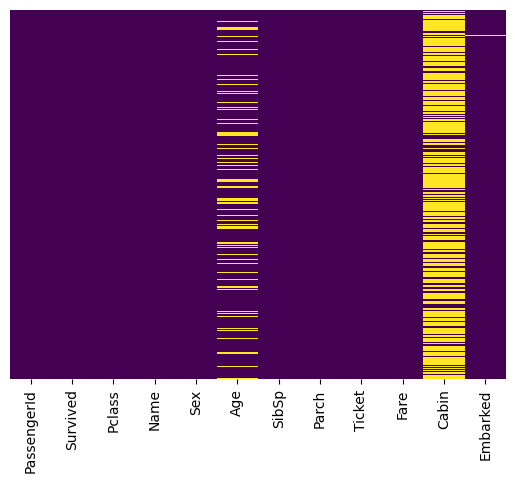

In [110]:
#Checking to see all missing values with a heatmap
sns.heatmap(TD.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')


In [111]:
#Handle missing values
TD['Age'] = TD['Age'].fillna(TD['Age'].median())
TD['Embarked'] = TD['Embarked'].fillna(TD['Embarked'].mode()[0])
TD.drop('Cabin', axis=1, inplace=True)

<Axes: >

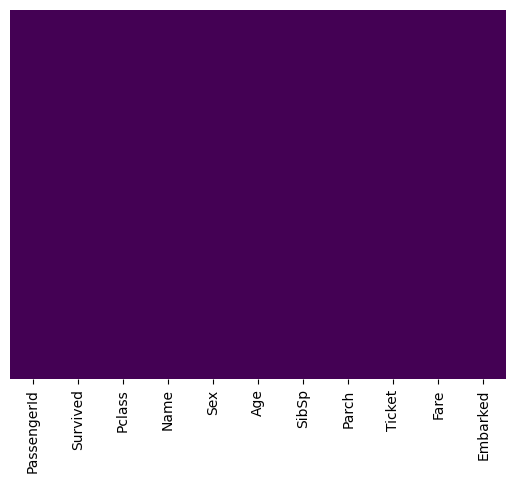

In [112]:
#Checking to see all missing values with a heatmap 
sns.heatmap(TD.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')


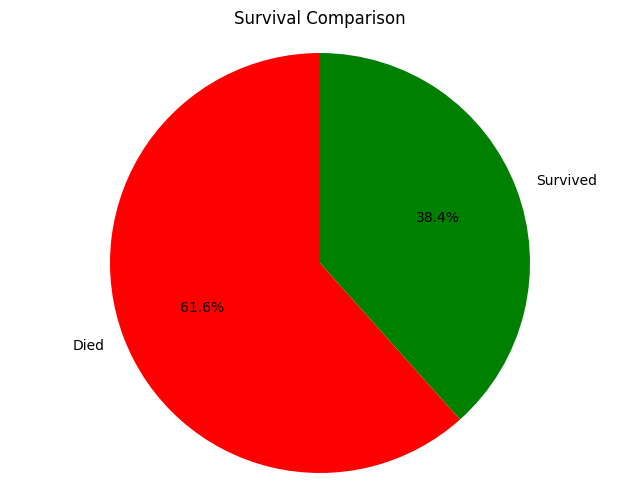

In [113]:
#Data Visualization: Pie chart for survival count
survival_count = TD['Survived'].value_counts()
labels = ['Died', 'Survived']
plt.figure(figsize=(8, 6))
plt.pie(survival_count, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Survival Comparison')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

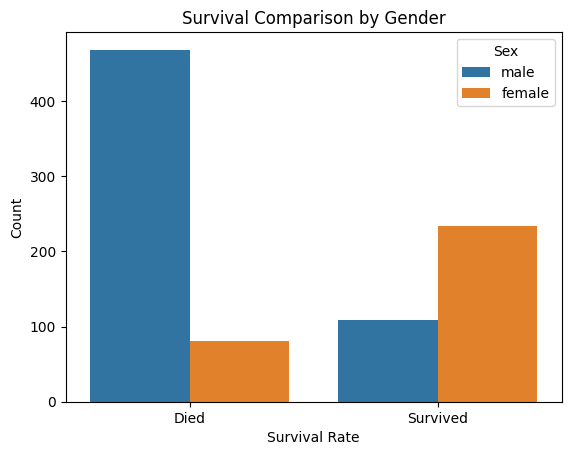

In [114]:
#A bar chart comparing survival rates between gender 
sns.countplot(x='Survived', hue='Sex', data=TD)
plt.title('Survival Comparison by Gender')
plt.xlabel('Survival Rate')
plt.ylabel('Count')
plt.xticks([0, 1], ['Died', 'Survived'])
plt.legend(title='Sex')
plt.show()



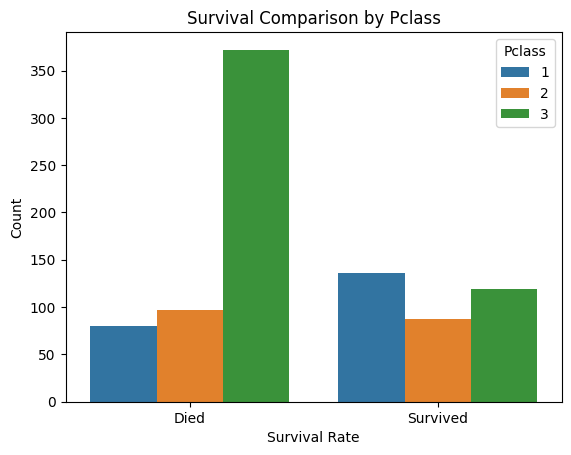

In [115]:
#A bar chart comparing survival rates between Pclass
sns.countplot(x='Survived',data=TD,hue = 'Pclass')
plt.title('Survival Comparison by Pclass')
plt.xlabel('Survival Rate')
plt.ylabel('Count')
plt.xticks([0, 1], ['Died', 'Survived'])
plt.legend(title='Pclass')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


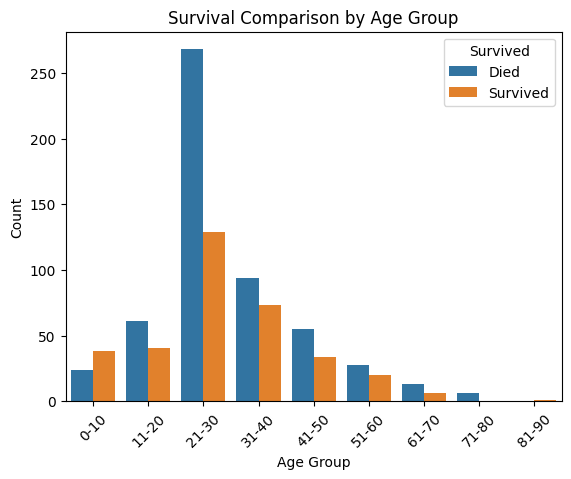

In [116]:
#A bar chart comparing the survival raates between age groups

#Define age groups 
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

# Add AgeGroup column to the DataFrame
TD['AgeGroup'] = pd.cut(TD['Age'], bins=age_bins, labels=age_labels, right=False)

#Bar chart comparing survival and death between age groups
sns.countplot(x='AgeGroup', hue='Survived', data=TD)
plt.title('Survival Comparison by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Survived', labels=['Died', 'Survived'])
plt.show()

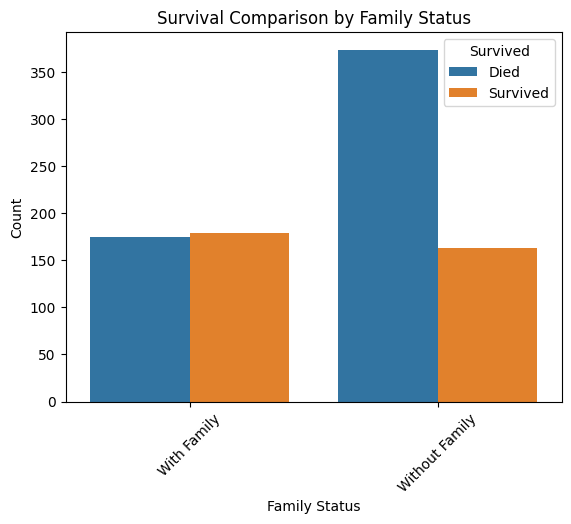

In [117]:
# Define a function to determine if a passenger has family aboard
def has_family(row):
    if row['SibSp'] > 0 or row['Parch'] > 0:
        return 'With Family'
    else:
        return 'Without Family'

TD['FamilyStatus'] = TD.apply(has_family, axis=1)

#Bar chart comparing death rates between people with and without families
sns.countplot(x='FamilyStatus', hue='Survived', data=TD)
plt.title('Survival Comparison by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Survived', labels=['Died', 'Survived'])
plt.show()


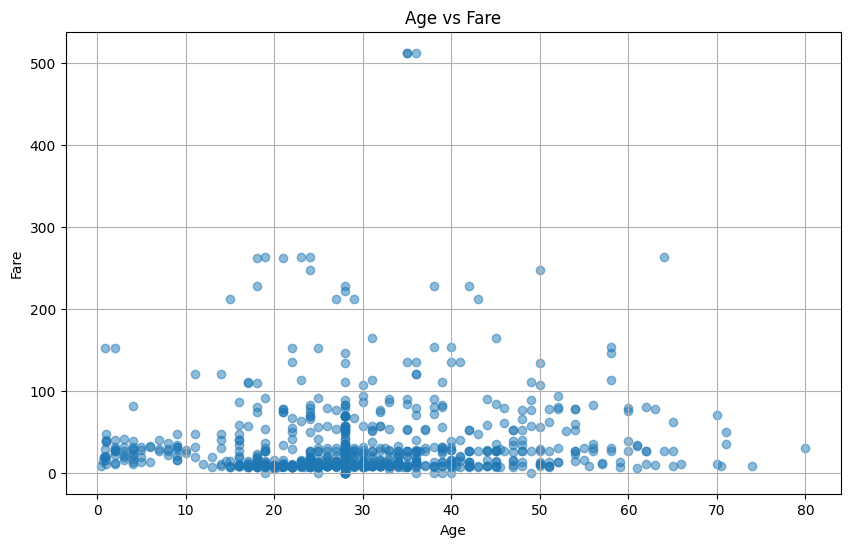

In [118]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(TD['Age'], TD['Fare'], alpha=0.5)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

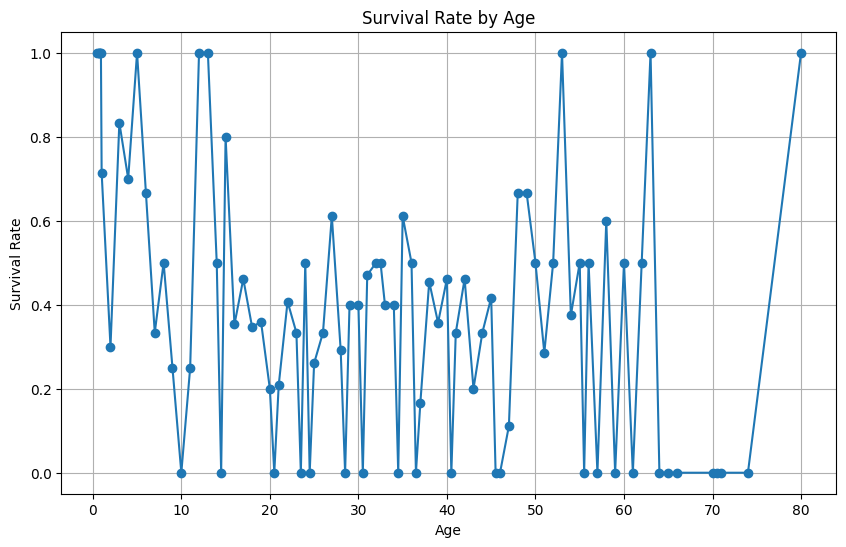

In [119]:
# Group data by age and calculate survival rate
age_survival = TD.groupby('Age')['Survived'].mean().reset_index()

# Line chart
plt.figure(figsize=(10, 6))
plt.plot(age_survival['Age'], age_survival['Survived'], marker='o', linestyle='-')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


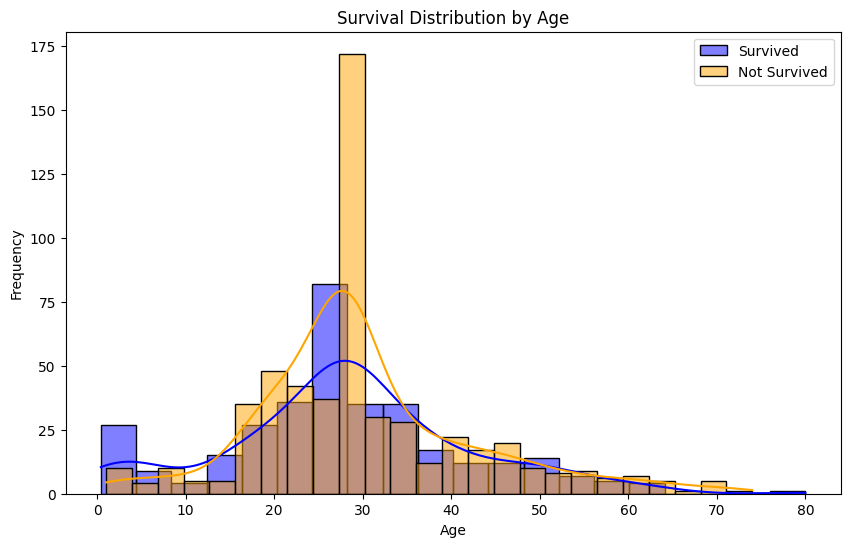

In [120]:
# Filter data for passengers who survived and those who didn't
survived_passengers = TD[TD['Survived'] == 1]
not_survived_passengers = TD[TD['Survived'] == 0]

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(survived_passengers['Age'], color='blue', label='Survived', kde=True)
sns.histplot(not_survived_passengers['Age'], color='orange', label='Not Survived', kde=True)

# Adding labels and title
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Adding legend
plt.legend()

# Show plot
plt.show()

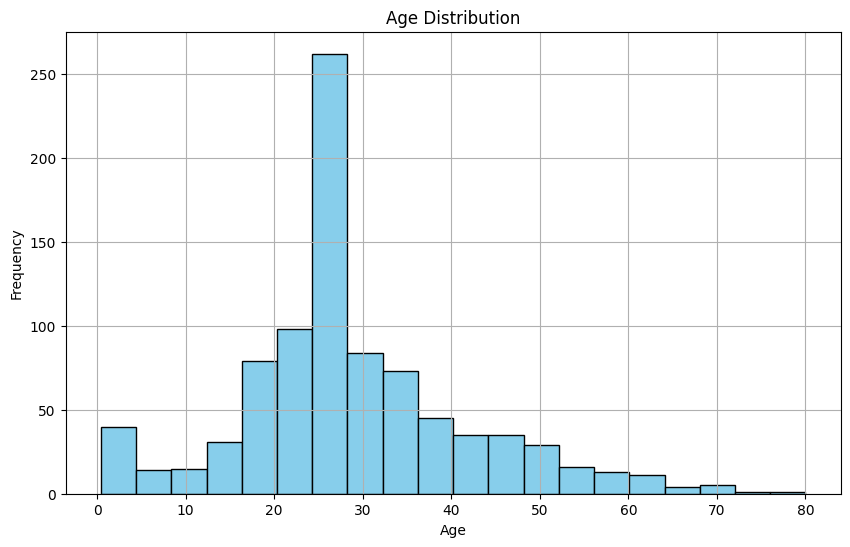

In [121]:
# Histogram of age distribution
plt.figure(figsize=(10, 6))
plt.hist(TD['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

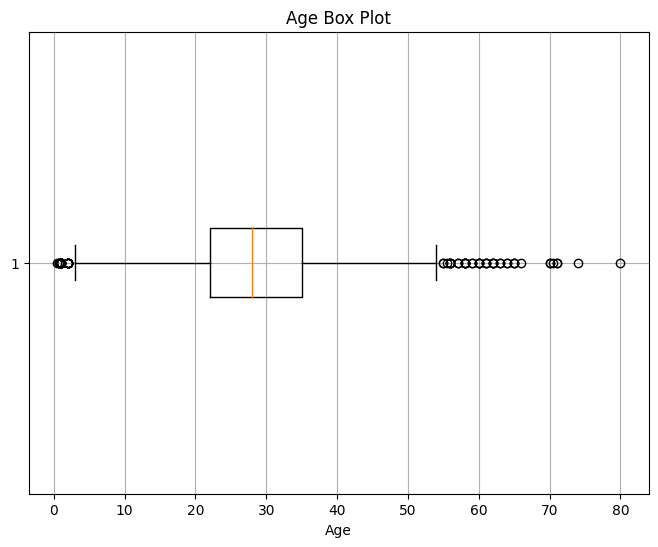

In [122]:
# Box plot for age
plt.figure(figsize=(8, 6))
plt.boxplot(TD['Age'].dropna(), vert=False)
plt.title('Age Box Plot')
plt.xlabel('Age')
plt.grid(True)
plt.show()

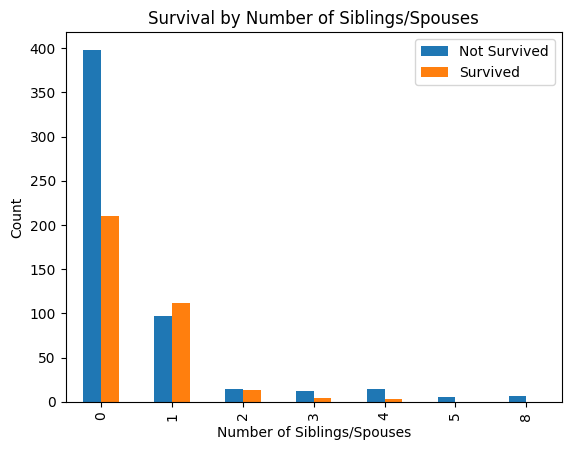

In [123]:
# Count of number of survivors and non-survivors for each value of SibSp
survival_counts = TD.groupby('SibSp')['Survived'].value_counts().unstack().fillna(0)

# Plot the bar chart
survival_counts.plot(kind='bar', stacked=False)
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.title('Survival by Number of Siblings/Spouses')
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.show()

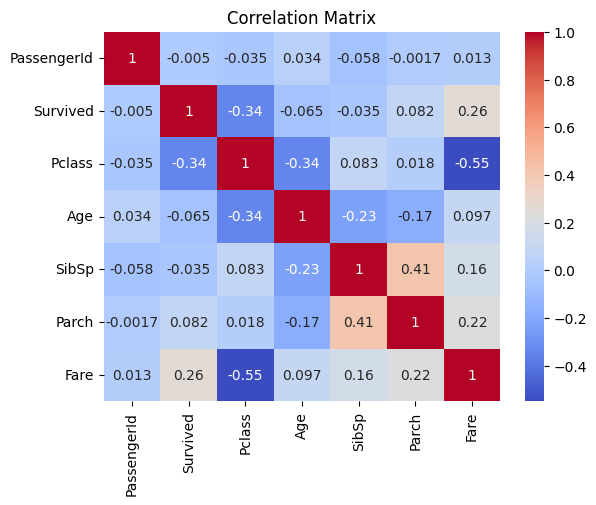

In [124]:
# Select numeric columns
numeric_columns = TD.select_dtypes(include=['number']).columns

# Calculate correlation matrix
correlation_matrix = TD[numeric_columns].corr()

# Visualize correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

'Cabin' column does not exist in the DataFrame.


Text(0, 0.5, 'Predicted')

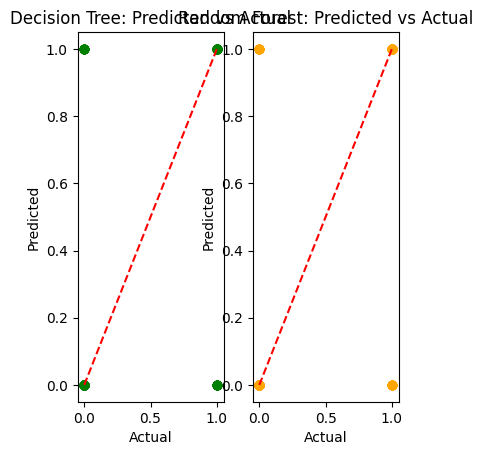

In [125]:
# Fill missing values in 'Age' and 'Embarked'
TD['Age'] = TD['Age'].fillna(TD['Age'].median())
TD['Embarked'] = TD['Embarked'].fillna(TD['Embarked'].mode()[0])

if 'Cabin' in TD.columns:
    TD.drop('Cabin', axis=1, inplace=True)
else:
    print("'Cabin' column does not exist in the DataFrame.")

X = TD[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = TD['Survived']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model with a higher max_iter value
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter to 1000 (or any other suitable value)

# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predict using Decision Tree Classifier
y_pred_dt = dt_classifier.predict(X_test)

# Decision Tree Results
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_dt, color='green')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Decision Tree: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict using Random Forest Classifier
y_pred_rf = rf_classifier.predict(X_test)

# Random Forest Results
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_rf, color='orange')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [126]:
TD = pd.read_csv("/kaggle/input/titanic/train.csv")
TD.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [128]:
women = TD.loc[TD.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [129]:
men = TD.loc[TD.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [141]:
y = TD["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(TD[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

print(output)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
